**Bank Account Prediction Analysis**

*Problem Statement*

Determine whether a study population from four African countries namely **Kenya, Uganda, Tanzania and Rwanda** owns a Bank account

In [490]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [491]:
df = pd.read_csv('capstone_train.csv')

In [492]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [493]:
df.shape

(23524, 13)

In [494]:
df.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [495]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [496]:
#selecting rows with age_of_repondent = 100
df[df.age_of_respondent > 90]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
209,Kenya,2018,uniqueid_210,No,Rural,No,3,95,Female,Parent,Widowed,No formal education,Informally employed
340,Kenya,2018,uniqueid_341,No,Rural,No,2,95,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
370,Kenya,2018,uniqueid_371,No,Rural,Yes,3,95,Male,Head of Household,Married/Living together,Primary education,Other Income
483,Kenya,2018,uniqueid_484,No,Rural,No,1,93,Female,Head of Household,Widowed,No formal education,Government Dependent
823,Kenya,2018,uniqueid_824,No,Rural,Yes,4,95,Male,Head of Household,Married/Living together,Primary education,Remittance Dependent
1389,Kenya,2018,uniqueid_1390,No,Rural,No,1,94,Female,Head of Household,Widowed,No formal education,Remittance Dependent
1434,Kenya,2018,uniqueid_1435,No,Rural,No,2,95,Female,Head of Household,Widowed,No formal education,Remittance Dependent
1482,Kenya,2018,uniqueid_1483,No,Rural,No,1,93,Male,Head of Household,Widowed,No formal education,Remittance Dependent
1833,Kenya,2018,uniqueid_1834,No,Urban,No,4,92,Male,Head of Household,Married/Living together,No formal education,Remittance Dependent
1851,Kenya,2018,uniqueid_1852,No,Rural,No,2,92,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing


In [497]:
pd.crosstab(df.bank_account,df.location_type, margins=True)

location_type,Rural,Urban,All
bank_account,,,
No,12672,7540,20212
Yes,1671,1641,3312
All,14343,9181,23524


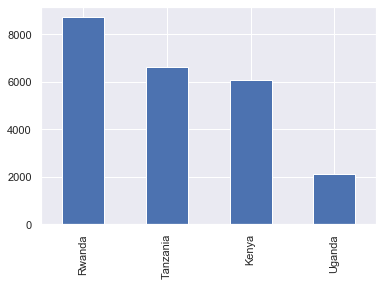

In [498]:
df['country'].value_counts().plot(kind='bar')

In [499]:
#selecting rows with same unique id
df[df.uniqueid == 'uniqueid_2']

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
6069,Rwanda,2016,uniqueid_2,Yes,Urban,Yes,4,26,Female,Spouse,Married/Living together,Secondary education,Self employed
14804,Tanzania,2017,uniqueid_2,No,Urban,No,2,100,Male,Head of Household,Single/Never Married,No formal education,Self employed
21424,Uganda,2018,uniqueid_2,No,Urban,Yes,8,65,Female,Head of Household,Widowed,Secondary education,Self employed


This shows same id was used in the four countries but unique in each country.

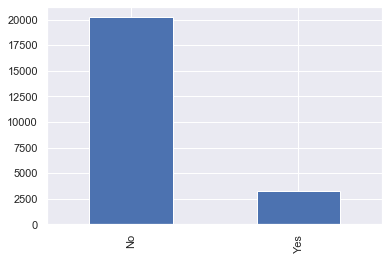

In [500]:
#visualising the number with bank accounts and without
df['bank_account'].value_counts().plot(kind='bar')

In [501]:
pd.crosstab(df.bank_account,df.education_level, margins=True)

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,All
bank_account,,,,,,,
No,4339,24,11698,3240,566,345,20212
Yes,176,11,1093,983,591,458,3312
All,4515,35,12791,4223,1157,803,23524


In [502]:
pd.crosstab(df.bank_account,df.job_type, margins=True)

job_type,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,All
bank_account,,,,,,,,,,,
No,112,4806,87,484,197,5152,614,884,2287,5589,20212
Yes,14,635,300,571,50,445,13,196,240,848,3312
All,126,5441,387,1055,247,5597,627,1080,2527,6437,23524


In [503]:
pd.crosstab(df.bank_account,df.marital_status, margins=True)

marital_status,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed,All
bank_account,,,,,,
No,1842,6,8883,7017,2464,20212
Yes,234,2,1866,966,244,3312
All,2076,8,10749,7983,2708,23524


In [504]:
#import library
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [505]:
#label encoding with categorical columns
df['location_type'] = label.fit_transform(df['location_type'])
df['cellphone_access'] = label.fit_transform(df['cellphone_access'])
df['gender_of_respondent'] = label.fit_transform(df['gender_of_respondent'])

In [506]:
df.head(2)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent


In [507]:
#mapping Yes and No values of bank account with 0 and 1 
df['bank_account'] = df['bank_account'].map({'No':0,'Yes':1})

In [508]:
df.head(3)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


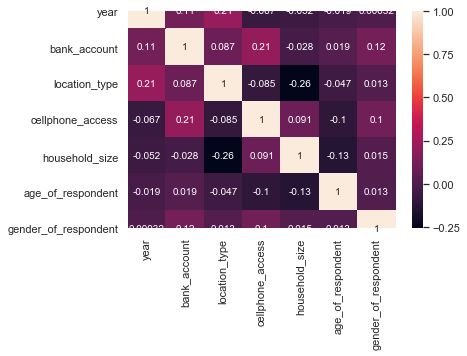

In [509]:
#visualizing corelation between columns
sns.heatmap(df.corr(), annot=True)

In [510]:
#correlation between the bank account and the numerical columns
df.corr()['bank_account'].sort_values()

household_size         -0.028326
age_of_respondent       0.019429
location_type           0.087288
year                    0.112318
gender_of_respondent    0.117234
cellphone_access        0.209669
bank_account            1.000000
Name: bank_account, dtype: float64

In [511]:
#converting categorical columns to numeric using the 'dummies' function
dummies = pd.get_dummies(df,columns=['education_level','job_type'])

In [512]:
dummies.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,...,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,...,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,...,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,...,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,Child,...,0,0,0,0,0,1,0,0,0,0


In [513]:
#Assigning the target coulmn(y) and features(X)
y = dummies[['bank_account']]
X = dummies.drop(columns=['bank_account','country','year','uniqueid','relationship_with_head','marital_status'], axis=1)

In [514]:
X.shape

(23524, 21)

**Using over sampling on the imbalanced data**

In [515]:
#import library
from imblearn.over_sampling import SMOTE

In [516]:
#training dataset with under sampling
sm = SMOTE()
X_res,y_res = sm.fit_sample(X,y)

In [517]:
X_res.shape

(40424, 21)

In [518]:
y_res.shape

(40424, 1)

In [519]:
from sklearn.model_selection import train_test_split

In [520]:
#spliting dataset as train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [521]:
X_train.shape,X_test.shape

((28296, 21), (12128, 21))

**Random Forest Classifier**

In [522]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

In [523]:
model.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=50)

In [524]:
model.score(X_test,y_test)

0.8739281002638523

In [525]:
y_predict = model.predict(X_test)

In [526]:
#importing confusion matrix library
from sklearn.metrics import confusion_matrix

In [527]:
confusion_matrix(y_test,y_predict)

array([[5197,  859],
       [ 670, 5402]], dtype=int64)

In [528]:
#bank account(y) prediction of split test data using Random Forest model
y_predict

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [529]:
from sklearn import metrics

In [530]:
#metrics.accuracy_score(y_test,y_predict)

**Logistic Regression Model**

In [531]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [532]:
lr_model.fit(X_train,y_train.values.ravel())

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [533]:
lr_model.score(X_test,y_test)

0.8021932717678101

In [534]:
lr_y_predict = lr_model.predict(X_test)

In [535]:
confusion_matrix(y_test,lr_y_predict)

array([[5263,  793],
       [1606, 4466]], dtype=int64)

In [536]:
#bank account(y) prediction of split test data using Logistic Regression
lr_y_predict

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

**Sector Vector Classifier**

In [537]:
from sklearn.svm import SVC

In [538]:
svc_model = SVC(C=5)
svc_model.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=5)

In [539]:
svc_model.score(X_test,y_test)

0.7885059366754618

*Model with the best accuracy was selected thus Random Forest*

**Testing Random Forest on the test dataset**

In [540]:
test = pd.read_csv('capstone_test.csv')

In [541]:
test.shape

(10086, 12)

In [542]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [543]:
#label encoding the categorical columns to numeric
test['location_type'] = label.fit_transform(test['location_type'])
test['cellphone_access'] = label.fit_transform(test['cellphone_access'])
test['gender_of_respondent'] = label.fit_transform(test['gender_of_respondent'])

In [544]:
test.head(2)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,1,1,3,30,1,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,1,1,7,51,1,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private


In [545]:
#One hot encoding to convert categorical columns
dummies2 = pd.get_dummies(test,columns=['education_level','job_type'])

In [546]:
dummies2.head(2)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,Kenya,2018,uniqueid_6056,1,1,3,30,1,Head of Household,Married/Living together,...,0,0,1,0,0,0,0,0,0,0
1,Kenya,2018,uniqueid_6060,1,1,7,51,1,Head of Household,Married/Living together,...,0,0,0,1,0,0,0,0,0,0


In [547]:
#selecting the features
test_x = dummies2.drop(columns=['country','year','uniqueid','relationship_with_head','marital_status'], axis=1)

In [548]:
test_x.shape

(10086, 21)

In [549]:
test_x.tail()

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
10081,0,0,2,62,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10082,1,1,8,42,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10083,1,1,1,39,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
10084,0,1,6,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10085,1,1,7,16,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [550]:
predict_test_y = model.predict(test_x)

In [551]:
model.predict_proba(test_x)

array([[0.04      , 0.96      ],
       [0.08333333, 0.91666667],
       [1.        , 0.        ],
       ...,
       [0.84      , 0.16      ],
       [0.928     , 0.072     ],
       [0.81373016, 0.18626984]])

In [552]:
predict_test_y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [553]:
test_data = pd.read_csv('capstone_test.csv')

In [554]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [555]:
test_data['bank_account'] = predict_test_y

In [556]:
test_data.tail(2)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed,0
10085,Uganda,2018,uniqueid_3002,Urban,Yes,7,16,Male,Other relative,Single/Never Married,Secondary education,Other Income,0


In [557]:
test_data['bank_account'] = test_data['bank_account'].map({0:'No',1:'Yes'})

In [558]:
test_data[test_data['bank_account'] == 'Yes'].head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,Yes
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,Yes
16,Kenya,2018,uniqueid_6085,Rural,Yes,5,35,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,Yes
24,Kenya,2018,uniqueid_6093,Rural,Yes,1,70,Female,Head of Household,Widowed,Primary education,Farming and Fishing,Yes
27,Kenya,2018,uniqueid_6096,Rural,Yes,6,52,Female,Head of Household,Single/Never Married,Secondary education,Farming and Fishing,Yes


In [559]:
test_data.shape

(10086, 13)

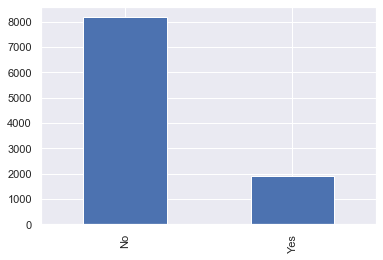

In [560]:
#visualising number with and without bank account
test_data['bank_account'].value_counts().plot(kind='bar')

In [561]:
pd.crosstab(test_data['bank_account'],test_data['education_level'], margins=True)

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,All
bank_account,,,,,,,
No,1771,7,4720,1328,214,131,8171
Yes,65,11,759,574,278,228,1915
All,1836,18,5479,1902,492,359,10086


In [562]:
# prediction function
def predict_bank_acount(location_type,cellphone_access, household_size, age_of_respondent, gender_of_respondent,education_level, job_type):
    
    
    input = [{
        'location_type' : location_type,
        'cellphone_access' : cellphone_access,
        'household_size' : household_size,
        'age_of_respondent' : age_of_respondent,
        'gender_of_respondent' : gender_of_respondent,
        
        'education_level_No formal education' : 1 if education_level == 'No formal education' else 0,
        'education_level_Other/Dont know/RTA' : 1 if education_level == 'Other/Dont know/RTA' else 0,
        'education_level_Primary education' : 1 if education_level == 'Primary education' else 0,
        'education_level_Secondary education' : 1 if education_level == 'Secondary education' else 0,
        'education_level_Tertiary education' : 1 if education_level == 'Tertiary education' else 0,
        'education_level_Vocational/Specialised training' : 1 if education_level == 'Vocational/Specialised training' else 0,
        
        'job_type_Dont Know/Refuse to answer' : 1 if job_type == 'Dont Know/Refuse to answer' else 0,
        'job_type_Farming and Fishing' : 1 if job_type == 'Farming and Fishing' else 0,
        'job_type_Formally employed Government' : 1 if job_type == 'Formally employed Government' else 0,
        'job_type_Formally employed Private' : 1 if job_type == 'Formally employed Private' else 0,
        'job_type_Government Dependent' : 1 if job_type == 'Government Dependent' else 0,
        'job_type_Informally employed' : 1 if job_type == 'Informally employed' else 0,
        'job_type_No Income' :1 if job_type == 'No Income' else 0,
        'job_type_Other Income' : 1 if job_type == 'Other Income' else 0,
        'job_type_Remittance Dependent' : 1 if job_type == 'Remittance Dependent' else 0,
        'job_type_Self employed' : 1 if job_type == 'Self employed' else 0 }]
  
    
    
    return model.predict(pd.DataFrame(input))[0]
    

In [563]:
#predict 0 as No bank account and 1 as Bank Account
predict_bank_acount(1,1,3,30,1,'Secondary education','Formally employed Government')

1

In [564]:
import pickle

In [565]:
#save model to a file
with open('bank_account_model_pickle', 'wb') as f:
    pickle.dump(model,f)